<a href="https://colab.research.google.com/github/Sulbae/Study-Material/blob/main/01_Studi_Kasus_Pertama_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## A. Problem Statements

* Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap harga diamonds?
* Berapa harga pasar diamonds dengan karakteristik atau fitur tertentu?  

## B. Goals/Tujuan

* Mengetahui fitur yang paling berkorelasi dengan harga diamonds.
* Membuat model machine learning yang dapat memprediksi harga diamonds seakurat mungkin berdasarkan fitur-fitur yang ada.

## C. Solution Statement

* Membangun model regresi dengan harga diamonds sebagai target.
* Membuat 3 model, lalu memilih 1 model terbaik yang memiliki tingkat akurasi terbaik berdasarkan metrik <i>Mean Squared Error</i> (MSE).

# 2. Importing Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# 3. Data Loading

In [ ]:
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Dari data di atas, terlihat bahwa terdapat 10 variabel dengan jumlah pengamatan sebanyak 53940.

# 4. Data Understanding

## A. Jumlah Masing-masing Variabel Beserta Tipenya

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Dari hasil di atas, terlihat bahwa kolom `cut`, `color`, `clarity` bertipe object, kolom `carat`, `depth`, `table`, `x`, `y`, `z` bertipe float64, dan kolom `price` bertipe int64.

## B. Deskripsi Variabel

Berikut merupakan arti dari masing-masing variabel beserta nilai-nilainya.

Variabel | Keterangan | Nilai
----------|----------|----------
carat | Berat dari berlian | 0.2-5.01
cut | Kualitas potongan berlian | Fair, Good, Very Good, Premium, Ideal
color | Warna berlian | J (worst) to D (best)
clarity | Tingkat kemurnian berlian | I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
depth | Persentase kedalaman | 43-79
table | Lebar bagian atas berlian relatif terhadap titik terlebar | 43-95
price | Harga berlian (dalam US dollar) | \$326-\$18,823
x | Panjang berlian dalam mm | 0-10.74
y | Lebar berlian dalam mm | 0-58.9
z | Kedalaman berlian dalam mm | 0-31.8

## C. Deskripsi Statistik Data

Selanjutnya, kita akan melihat deskripsi statistik dari data yang dimiliki.

In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# 5. Data Cleaning

## A. Menangani Missing Value

Pertama, kita akan memeriksa apakah ada nilai 0 pada kolom `x`, `y`, `z`.

In [ ]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


Terlihat bahwa ada beberapa nilai di kolom `x`, `y`, dan `z` yang bernilai 0. Kita akan memeriksa baris dari nilai-nilai 0 tersebut.

In [ ]:
diamonds.loc[(diamonds["z"] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Terlihat bahwa pada untuk `z` bernilai 0, ternyata juga terdapat seluruh nilai 0 pada kolom `x` dan `y`. Oleh karena itu, baris-baris ini akan dihapus.

In [ ]:
# Menghapus baris dengan nilai "x", "y", dan "z" = 0
diamonds = diamonds.loc[(diamonds[["x", "y", "z"]] != 0).all(axis = 1)]

# Memeriksa ukuran data yang telah dihapus beberapa barisnya
diamonds.shape

(53920, 10)

## B. Memeriksa Outlier

Selanjutnya, kita akan memeriksa apakah terdapat outlier pada kolom-kolom numerik.

<Axes: xlabel='carat'>

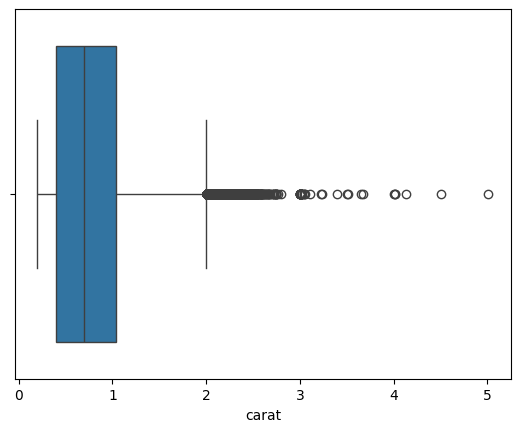

In [ ]:
# Kolom carat
sns.boxplot(x = diamonds["carat"])

<Axes: xlabel='table'>

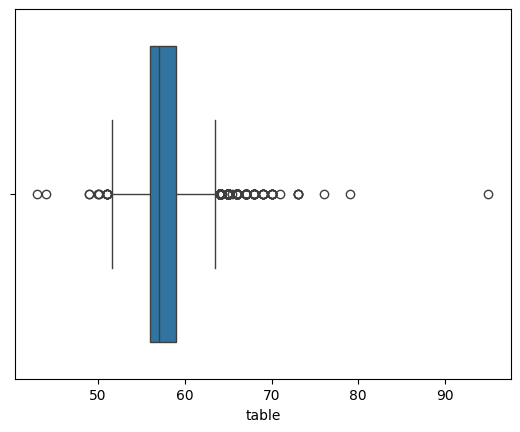

In [ ]:
# Kolom table
sns.boxplot(x = diamonds["table"])

<Axes: xlabel='x'>

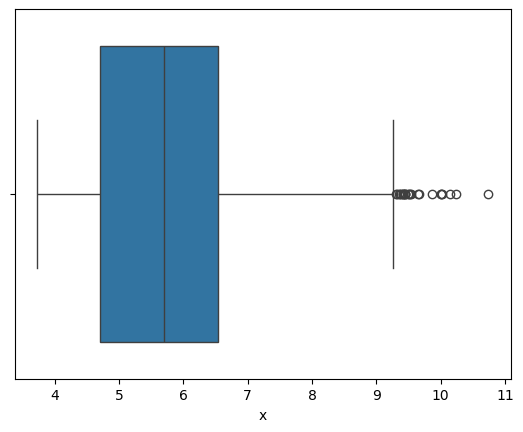

In [ ]:
# Fitur x
sns.boxplot(x = diamonds["x"])

Terlihat bahwa terdapat beberapa outlier pada kolom-kolom di atas. Pada kasus ini, kita akan menghapus outlier menggunakan teknik Inter Quartile Range (IQR). IQR didefinisikan sebagai
* $IQR = Q3 - Q1$
* Batas Bawah = $Q1 - 1.5 * IQR$
* Batas Atas = $Q3 + 1.5 * IQR$

In [ ]:
numeric_columns = diamonds.select_dtypes(include = ["number"]).columns

# Calculate Q1, Q3, and IQR only for numeric columns
Q1 = diamonds[numeric_columns].quantile(0.25)
Q3 = diamonds[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter the DataFrame based on the IQR
diamonds = diamonds[~((diamonds[numeric_columns] < (Q1 - 1.5 * IQR)) |
                    (diamonds[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis = 1)]

diamonds.shape

(47524, 10)

## C. Memeriksa Data Duplikat

Selanjutnya, kita akan memeriksa apakah terdapat data duplikat pada dataset ini.

1. Apa syntax code untuk menampilkan jumlah data duplikat pada data `diamonds`?

In [ ]:
# Menampilkan jumlah data duplikat
diamonds.duplicated().sum()

112

Berdasarkan hasil di atas, terdapat 114 data duplikat dalam dataset ini. Kita akan memeriksa data duplikat ini.

In [ ]:
# Menampilkan data duplikat
diamonds[diamonds.duplicated]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
3704,1.00,Ideal,E,SI2,62.9,56.0,3450,6.32,6.30,3.97
...,...,...,...,...,...,...,...,...,...,...
47069,0.52,Ideal,D,VS2,61.8,55.0,1822,5.16,5.19,3.20
47296,0.30,Good,J,VS1,63.4,57.0,394,4.23,4.26,2.69
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17


Dari tampilan di atas, terlihat bahwa ada data duplikat, sehingga kita akan menghapus data-data tersebut.

In [ ]:
# Menghapus baris data duplikat
diamonds.drop_duplicates(inplace = True)

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47412 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47412 non-null  float64
 1   cut      47412 non-null  object 
 2   color    47412 non-null  object 
 3   clarity  47412 non-null  object 
 4   depth    47412 non-null  float64
 5   table    47412 non-null  float64
 6   price    47412 non-null  int64  
 7   x        47412 non-null  float64
 8   y        47412 non-null  float64
 9   z        47412 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.0+ MB


# 6. Exploratory Data Analysis

## A. Univariate Analysis

In [ ]:
# Membagi kolom-kolom menjadi kolom numerikal dan kolom kategorikal
numerical_features = ["price", "carat", "depth", "table", "x", "y", "z"]
categorical_features = ["cut", "color", "clarity"]

           jumlah sampel  persentase
cut                                 
Ideal              20278        42.8
Premium            12081        25.5
Very Good          10984        23.2
Good                3739         7.9
Fair                 330         0.7


<Axes: title={'center': 'cut'}, xlabel='cut'>

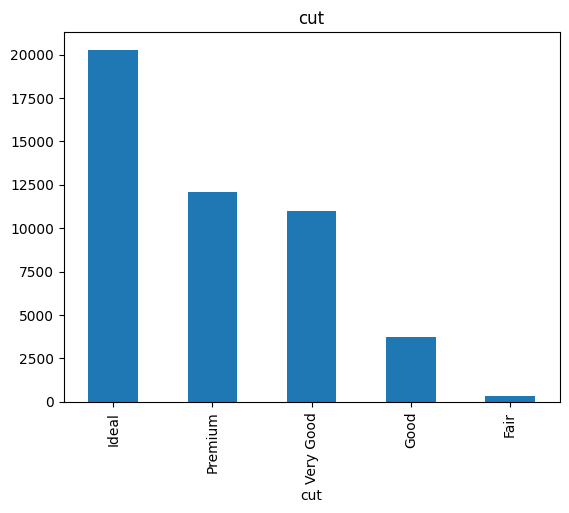

In [ ]:
# Memeriksa Fitur Cut
feature = categorical_features[0]
# count = diamonds[feature].value_counts()
count_cut = diamonds[feature].value_counts()
percent = 100 * diamonds[feature].value_counts(normalize = True)
df_cut = pd.DataFrame({"jumlah sampel" : count_cut, "persentase" : percent.round(1)})
print(df_cut)
count_cut.plot(kind = "bar", title = feature)

2. Bagaimana cara membuat pie plot berdasarkan code cell di atas, menggunakan library matplotlib sehingga menghasilkan output berikut?

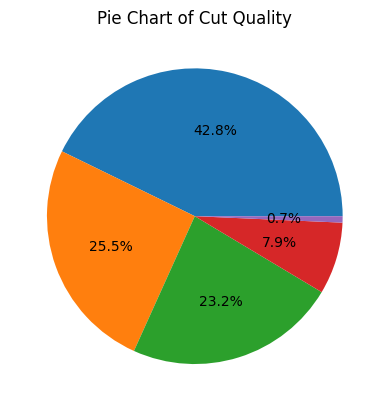

[]

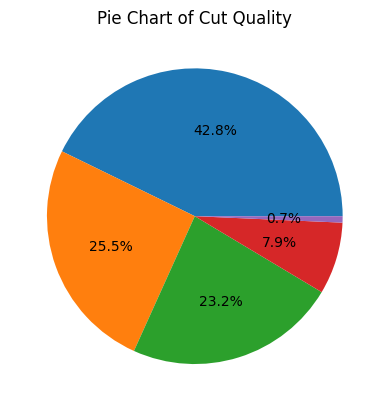

In [ ]:
plt.pie(count_cut, autopct = "%1.1f%%")
plt.title("Pie Chart of Cut Quality")
plt.plot()

3. Bagaimana cara menambahkan legends pada pie plot di atas menggunakan library matplotlib sehingga menghasilkan output berikut?

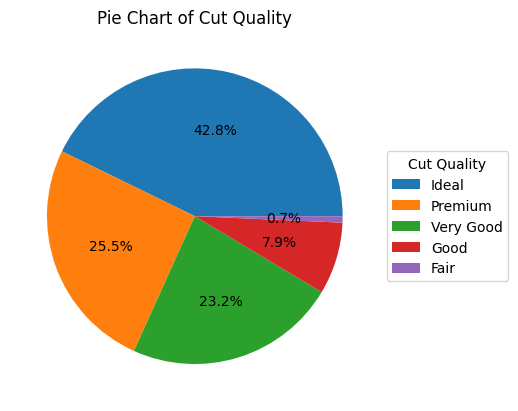

[]

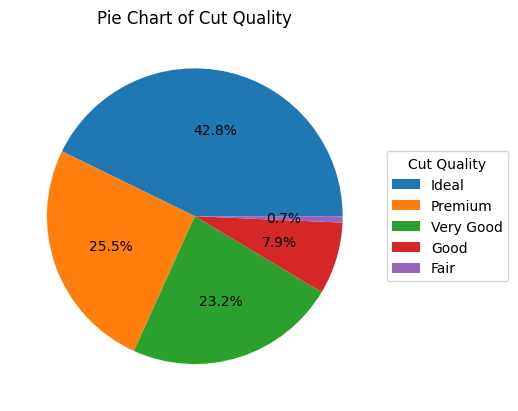

In [ ]:
plt.pie(count_cut, autopct = "%1.1f%%")
labels = ["Ideal", "Premium", "Very Good", "Good", "Fair"]
plt.legend(labels, title = "Cut Quality", loc = "center left", bbox_to_anchor = (1, 0, 0, 1))
plt.title("Pie Chart of Cut Quality")
plt.plot()

### b. Fitur Color

       jumlah sampel  persentase
color                           
G              10056        21.2
E               8893        18.8
F               8450        17.8
H               7154        15.1
D               6175        13.0
I               4455         9.4
J               2229         4.7


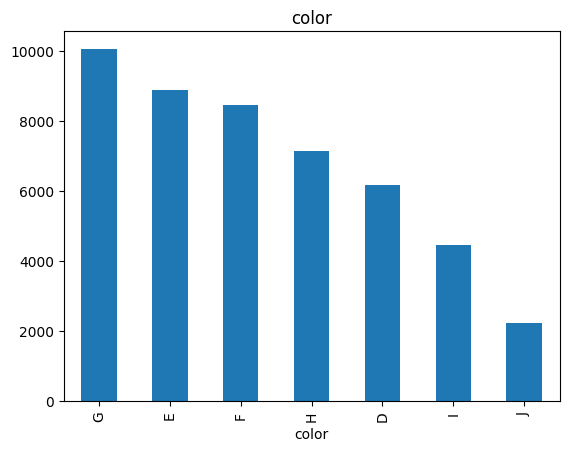

In [ ]:
# Fitur Color
feature = categorical_features[1]
count_color = diamonds[feature].value_counts()
percent = 100 * diamonds[feature].value_counts(normalize = True)
df_color = pd.DataFrame({"jumlah sampel" : count_color, "persentase" : percent.round(1)})
print(df_color)
count_color.plot(kind = "bar", title = feature);

         jumlah sampel  persentase
clarity                           
SI1              11524        24.3
VS2              10905        23.0
SI2               7378        15.6
VS1               7360        15.5
VVS2              4673         9.9
VVS1              3455         7.3
IF                1644         3.5
I1                 473         1.0


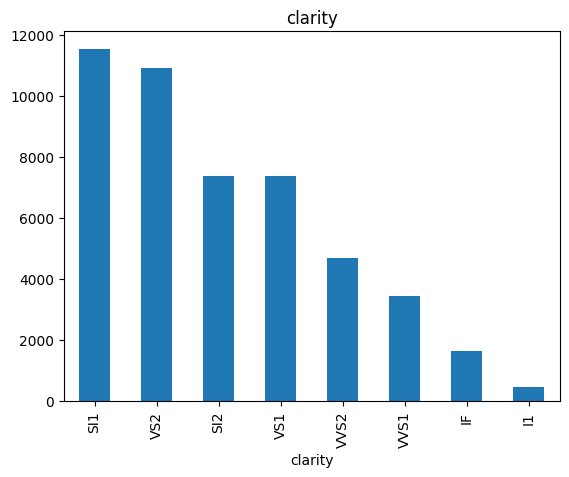

In [ ]:
# Fitur Clarity
feature = categorical_features[2]
count_clarity = diamonds[feature].value_counts()
percent = 100 * diamonds[feature].value_counts(normalize = True)
df = pd.DataFrame({"jumlah sampel" : count_clarity, "persentase" : percent.round(1)})
print(df)
count_clarity.plot(kind = "bar", title = feature);

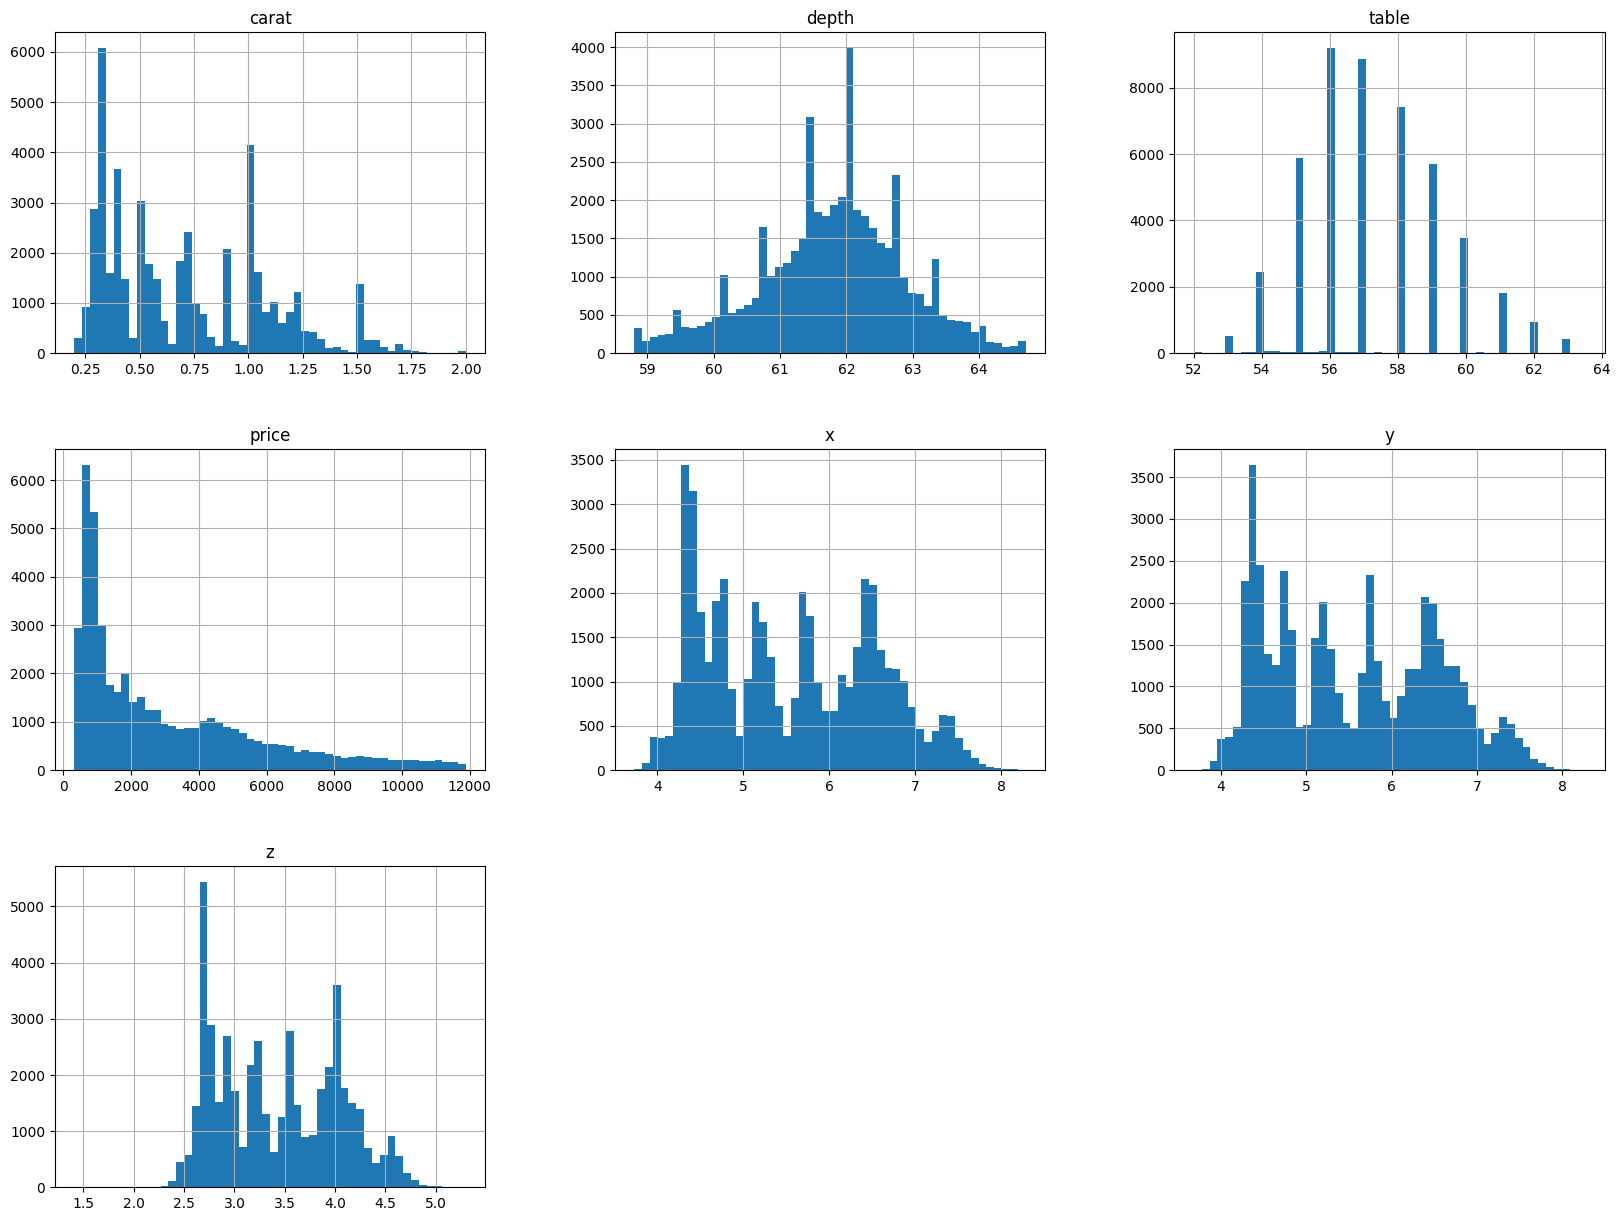

In [ ]:
# Numerical feature
diamonds.hist(bins = 50, figsize = (20, 15))
plt.show()

## B. Multivariate Analysis

<ipython-input-23-b44596d9af78>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = "price", kind = "bar", dodge = False, height = 4,
<ipython-input-23-b44596d9af78>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = "price", kind = "bar", dodge = False, height = 4,
<ipython-input-23-b44596d9af78>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = "price", kind = "bar", dodge = False, height = 4,


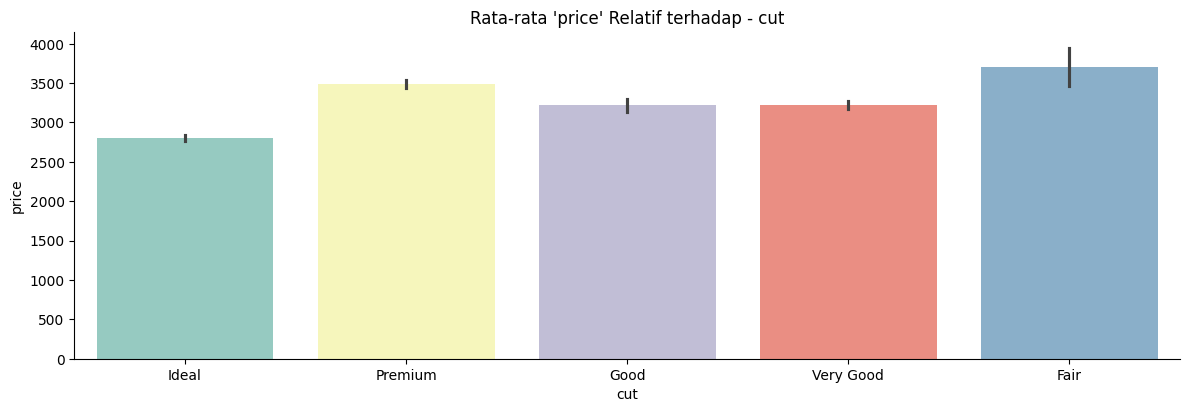

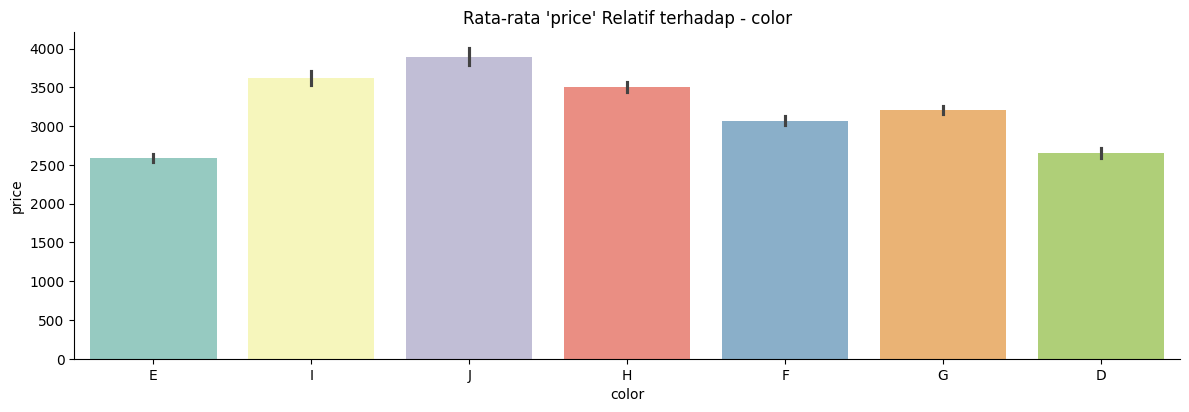

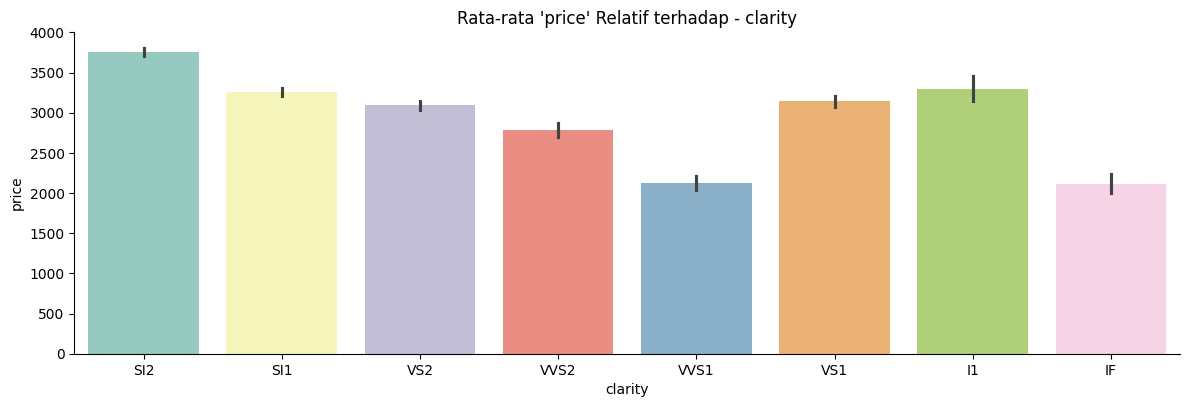

In [ ]:
cat_features = diamonds.select_dtypes(include = "object").columns.to_list()

for col in cat_features:
  sns.catplot(x = col, y = "price", kind = "bar", dodge = False, height = 4,
              aspect = 3, data = diamonds, palette = "Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
# sns.pairplot(diamonds, diag_kind = "kde") # kde = kernel density estimate
# sns.pairplot(diamonds, diag_kind = "hist")
# sns.pairplot(diamonds, diag_kind = None)

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

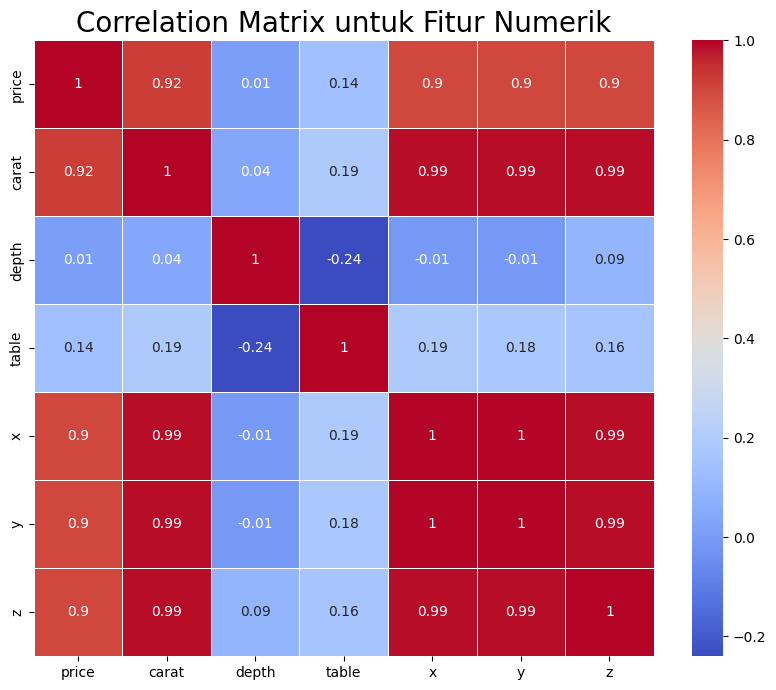

In [ ]:
plt.figure(figsize = (10, 8))
correlation_matrix = diamonds[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot = True
sns.heatmap(data = correlation_matrix, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size = 20)

# 7. Data Preparation

4. Apa syntax code untuk menghapus kolom `depth`?

In [ ]:
# diamonds.drop(["depth"], inplace = True, axis = 1)
# diamonds.head()

In [ ]:
# Encoding Fitur Kategori
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds["cut"], prefix = "cut")],axis = 1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds["color"], prefix = "color")],axis = 1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds["clarity"], prefix = "clarity")],axis = 1)
diamonds.drop(["cut", "color", "clarity"], axis = 1, inplace = True)
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
5,0.24,62.8,57.0,336,3.94,3.96,2.48,False,False,False,...,False,True,False,False,False,False,False,False,False,True


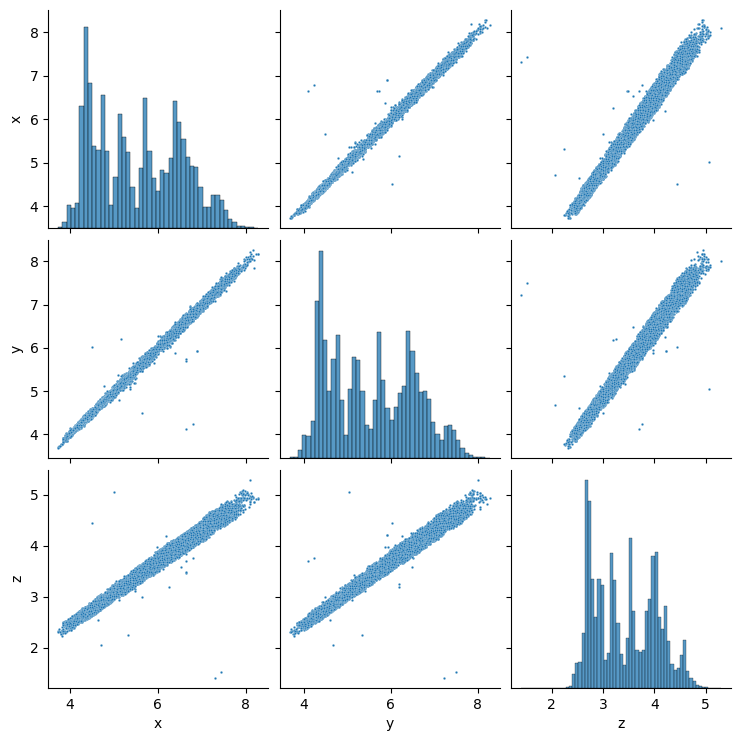

In [ ]:
# Reduksi Dimensi dengan PCA
sns.pairplot(diamonds[["x", "y", "z"]], plot_kws = {"s": 3});

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3, random_state = 123)
pca.fit(diamonds[["x", "y", "z"]])
princ_comp = pca.transform(diamonds[["x", "y", "z"]])

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

In [ ]:
pca = PCA(n_components = 1, random_state = 123)
pca.fit(diamonds[["x", "y", "z"]])
diamonds["dimension"] = pca.transform(diamonds.loc[:,  ("x", "y", "z")]).flatten()
diamonds.drop(["x", "y", "z"], axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
# Train-Test-Split
X = diamonds.drop(["price"],axis = 1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47412
Total # of sample in train dataset: 42670
Total # of sample in test dataset: 4742


StandardScaler dapat dirumuskan sebagai
$$z = \frac{x-u}{s}$$
dengan
* $z$: Nilai data setelah distandarisasi
* $x$: Nilai data sebelum distandarisasi
* $u$: Nilai rata-rata keseluruhan data
* $s$: Nilai standar deviasi data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standarisasi
numerical_features = ["carat", "table", "dimension"]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
43529,-0.590652,0.857198,-0.605648
41941,-1.156881,2.339307,-1.347323
18797,2.159605,-1.612984,1.822004
53186,-0.321019,2.833343,-0.123992
35756,-1.022065,-0.624911,-1.130754


In [ ]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42670.0000,42670.0000,42670.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3726,-2.6011,-1.8840
25%,-0.8872,-0.6249,-0.9301
50%,-0.2671,-0.1309,-0.1079
75%,0.8114,0.8572,0.8857
max,3.4808,3.0804,2.7011


# 8. Model Development

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index = ["train_mse", "test_mse"],
                      columns = ["KNN", "RandomForest", "Boosting"])

## A. Model Development dengan K-Nearest Neighbor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc["train_mse","knn"] = mean_squared_error(y_pred = knn.predict(X_train), y_true = y_train)

## B. Model Development dengan Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators = 50, max_depth = 16, random_state = 55, n_jobs = -1)
RF.fit(X_train, y_train)
models.loc["train_mse", "RandomForest"] = mean_squared_error(y_pred = RF.predict(X_train), y_true = y_train)

## C. Model Development dengan Boosting Algorithm

In [ ]:
boosting = AdaBoostRegressor(learning_rate = 0.05, random_state = 55)
boosting.fit(X_train, y_train)
models.loc["train_mse", "Boosting"] = mean_squared_error(y_pred = boosting.predict(X_train), y_true = y_train)

# 9. Evaluasi Model

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata = 0 dan varians = 1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Untuk evaluasi, kita akan menggunakan *Mean Squared Error* (MSE). MSE dirumuskan sebagai
$$MSE = \frac{\Sigma (y_i - \hat{y_i})^2}{n}$$
dengan
* $y_i$: Nilai y sesungguhnya
* $\hat{y_i}$: Nilai y prediksi
* $n$: Jumlah data

Terkadang, evaluasi juga dapat menggunakan *Root Mean Squared Error* (RMSE). Standarnya, RMSE adalah akar dari MSE sehingga dapat dirumuskan
$$RMSE = \sqrt{MSE} = \sqrt{\frac{\Sigma (y_i - \hat{y_i})^2}{n}}$$

Selain itu, ada yang disebut dengan *Mean Absolute Error* (MAE). MAE dirumuskan sebagai
$$MAE = \frac{\Sigma |y_i - \hat{y_i|}}{n}$$

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {"KNN": knn, "RF": RF, "Boosting": boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, "train"] = mean_squared_error(y_true = y_train, y_pred = model.predict(X_train))
    mse.loc[name, "test"] = mean_squared_error(y_true = y_test, y_pred = model.predict(X_test))

# Panggil mse
mse

,train,test
KNN,267765.156969,335629.988003
RF,50307.806308,138417.042538
Boosting,893600.378883,904967.208969


In [ ]:
# MSE dari scratch

def MSE(y_true, y_test):
    sum_error = 0.0
    # Convert pandas Series to numpy arrays to use positional indexing
    y_true_values = y_true.values
    y_test_values = y_test

    # Ensure y_test_values is a NumPy array
    if not isinstance(y_test_values, np.ndarray):
        y_test_values = np.array(y_test_values)

    # loop over all values using the length of the shorter array
    for i in range(min(len(y_true_values), len(y_test_values))):
        # the error is the sum of (y_true - prediction)^2
        prediction_error =  y_true_values[i] - y_test_values[i]
        sum_error += (prediction_error ** 2)
    # now normalize using the length of the shorter array
    mean_error = sum_error / float(min(len(y_true_values), len(y_test_values)))
    return mean_error

mse_2 = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

for name, model in model_dict.items():
    mse_2.loc[name, "train"] = MSE(y_train, model.predict(X_train))
    mse_2.loc[name, "test"] = MSE(y_test, model.predict(X_test))

mse_2

,train,test
KNN,267765.156969,335629.988003
RF,50307.806308,138417.042538
Boosting,893600.378883,904967.208969


In [ ]:
# RMSE dari scratch

def RMSE(y_true, y_test):
    sum_error = 0.0
    # Convert pandas Series to numpy arrays to use positional indexing
    y_true_values = y_true.values
    y_test_values = y_test

    # Ensure y_test_values is a NumPy array
    if not isinstance(y_test_values, np.ndarray):
        y_test_values = np.array(y_test_values)

    # loop over all values using the length of the shorter array
    for i in range(min(len(y_true_values), len(y_test_values))):
        # the error is the sum of (y_true - prediction)^2
        prediction_error =  y_true_values[i] - y_test_values[i]
        sum_error += (prediction_error ** 2)
    # now normalize using the length of the shorter array
    mean_error = np.sqrt(sum_error / float(min(len(y_true_values), len(y_test_values))))
    return mean_error

rmse = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

for name, model in model_dict.items():
    rmse.loc[name, "train"] = RMSE(y_train, model.predict(X_train))
    rmse.loc[name, "test"] = RMSE(y_test, model.predict(X_test))

rmse

,train,test
KNN,517.460295,579.335816
RF,224.294018,372.044409
Boosting,945.304384,951.297645


In [ ]:
# MAE dari scratch

def MAE(y_true, y_test):
    sum_error = 0.0
    # Convert pandas Series to numpy arrays to use positional indexing
    y_true_values = y_true.values
    y_test_values = y_test

    # Ensure y_test_values is a NumPy array
    if not isinstance(y_test_values, np.ndarray):
        y_test_values = np.array(y_test_values)

    # loop over all values using the length of the shorter array
    for i in range(min(len(y_true_values), len(y_test_values))):
        # the error is the sum of (y_true - prediction)^2
        prediction_error =  y_true_values[i] - y_test_values[i]
        sum_error += np.abs(prediction_error)
    # Now normalize using the length of the shorter array
    mean_error = sum_error / float(min(len(y_true_values), len(y_test_values)))
    return mean_error

mae = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

for name, model in model_dict.items():
    mae.loc[name, "train"] = MAE(y_train, model.predict(X_train))
    mae.loc[name, "test"] = MAE(y_test, model.predict(X_test))

mae

,train,test
KNN,303.607235,343.191164
RF,135.197304,210.158412
Boosting,601.456771,596.303727


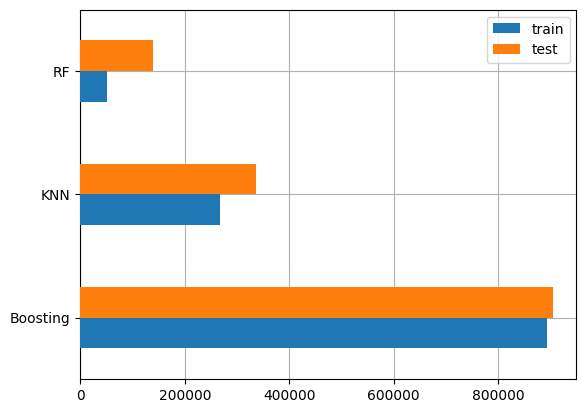

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by = "test", ascending = False).plot(kind = "barh", ax = ax, zorder = 3)
ax.grid(zorder = 0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
11870,5107,4910.0,5179.2,7429.8
